In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

df = pd.read_csv('blogs.csv')

print(df.head())
print(df.info())
print(df['Labels'].value_counts())

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d', '', text)
    return text

df['Data'] = df['Data'].apply(clean_text)

stop_words = set(stopwords.words('english'))
df['Data'] = df['Data'].apply(lambda x: ' '.join(
    [word for word in word_tokenize(x) if word not in stop_words]))

print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt    

In [5]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Data']).toarray()
y = df['Labels']

Accuracy: 0.8025
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.58      0.83      0.68        18
           comp.graphics       0.74      0.78      0.76        18
 comp.os.ms-windows.misc       0.81      0.95      0.88        22
comp.sys.ibm.pc.hardware       0.71      0.88      0.79        25
   comp.sys.mac.hardware       0.80      0.57      0.67        21
          comp.windows.x       0.93      0.52      0.67        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.71      0.94      0.81        18
         rec.motorcycles       0.93      0.81      0.87        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.71      1.00      0.83        15
               sci.crypt       0.76      1.00      0.86        19
         sci.electronics       0.90      0.56      0.69        16
                 sci.med       0.8

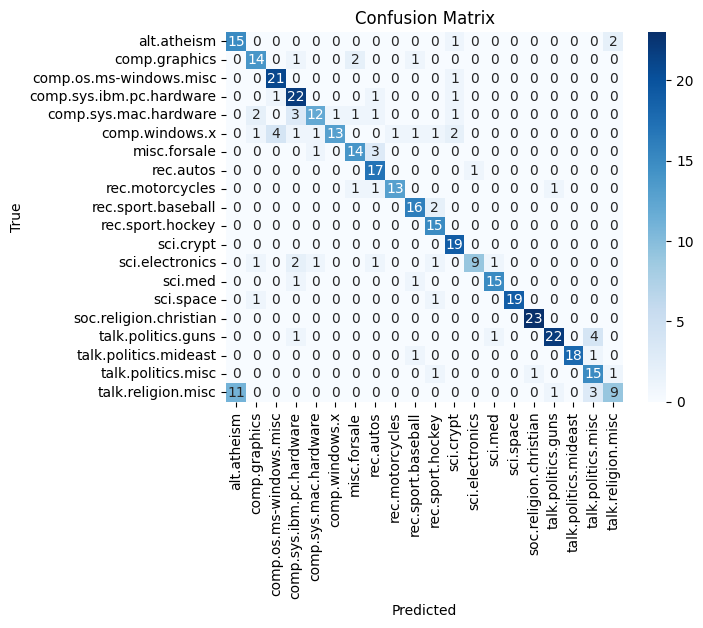

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Sentiment
Positive    1499
Negative     498
Neutral        3
Name: count, dtype: int64


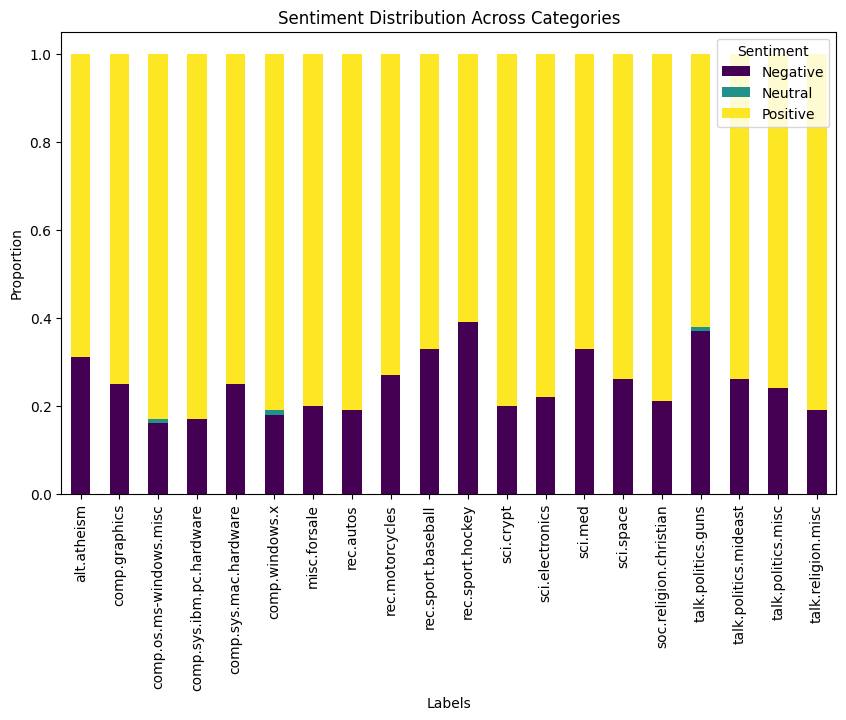

In [7]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)

print(df['Sentiment'].value_counts())

sentiment_dist = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
sentiment_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Distribution Across Categories')
plt.ylabel('Proportion')
plt.show()

In [10]:
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("Precision, Recall, F1-score:\n", classification_report(y_test, y_pred))

# Discuss challenges
challenges = """
1. Imbalanced categories might lead to biased predictions.
2. Sentiment analysis is context-sensitive and may not always reflect true sentiment.
3. Limited vocabulary or pre-trained embeddings may affect accuracy.
"""
print(challenges)

# Insights from sentiment analysis
insights = """
1. Categories with predominantly positive sentiments may reflect uplifting topics.
2. Neutral sentiments suggest informative or balanced blog content.
3. Negative sentiments could highlight controversial or critical themes.
"""
print(insights)

Final Accuracy: 0.8025
Precision, Recall, F1-score:
                           precision    recall  f1-score   support

             alt.atheism       0.58      0.83      0.68        18
           comp.graphics       0.74      0.78      0.76        18
 comp.os.ms-windows.misc       0.81      0.95      0.88        22
comp.sys.ibm.pc.hardware       0.71      0.88      0.79        25
   comp.sys.mac.hardware       0.80      0.57      0.67        21
          comp.windows.x       0.93      0.52      0.67        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.71      0.94      0.81        18
         rec.motorcycles       0.93      0.81      0.87        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.71      1.00      0.83        15
               sci.crypt       0.76      1.00      0.86        19
         sci.electronics       0.90      0.56      0.69        16
                 sci.m